# My first simulation

As a minimal example of setting up a simulation using rumdpy,
let us simulation of a Lennard-Jones FCC crystal in the constant $NVT$ ensemble.

If rumdpy is installed correctly, the following code should run without any errors.

In [2]:
import rumdpy as rp

We will also import NumPy for numerical calculations and Matplotlib for plotting.

In [3]:
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting

Next, we set up a configuration of a FCC lattice with $8 \times 8 \times 8$ unit cells, with a density of $\rho = 0.973$ and temperature $T = 2\times 0.8$. Below, we use the `make_lattice` function to create a configuration object.

In [4]:
# Setup configuration: FCC Lattice
positions, box_vector = rp.tools.make_lattice(
    unit_cell=rp.unit_cells.FCC, 
    cells=[8, 8, 8], 
    rho=0.973
)

We can visualize the configuration using Matplotlib. The positions can be accessed with the `get_vector` method using the `r` attribute. All vector properties are NumPy arrays.

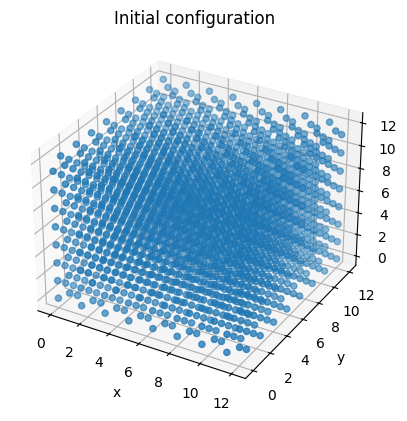

In [5]:
# Make 3D plot using matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Initial configuration')
ax.scatter(positions[:,0], positions[:,1], positions[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

We will use these coordinates to make a 

In [6]:
# Make a configuration object
configuration = rp.Configuration()

# Set positions and the box vector
configuration['r'] = positions
configuration.simbox = rp.Simbox(configuration.D, box_vector)

# Setup masses and velocities
temperature = 0.8
configuration['m'] = 1.0  # Set all masses to 1.0
configuration.randomize_velocities(T=temperature * 2)

Next, we set up the pair potential and integrator for the simulation.

In [7]:
# Setup pair potential: Single component 12-6 Lennard-Jones
pairfunc = rp.apply_shifted_force_cutoff(rp.LJ_12_6_sigma_epsilon)
sig, eps, cut = 1.0, 1.0, 2.5
pairpot = rp.PairPotential2(pairfunc, params=[sig, eps, cut], max_num_nbs=1000)

# Setup integrator: NVT
integrator = rp.integrators.NVT(temperature=0.70, tau=0.2, dt=0.005)

We now have all the components to set up a simulation object. 

In [8]:
# Setup Simulation. 
sim = rp.Simulation(
    configuration=configuration,
    interactions=pairpot,
    integrator=integrator,
    num_timeblocks=10,
    steps_per_timeblock=1000,
    storage='memory'
)

Storing results in memory. Expected footprint  5.16 MB.


Finally, we run the simulation using the `run` method.

In [9]:
sim.run()  # Run simulation

time= 0.000     u= -5.558    w= 1.265     lap= 980.960   m= 1.000     k= 1.063     fsq= 698.797   
time= 5.000     u= -5.561    w= 1.274     lap= 981.204   m= 1.000     k= 1.058     fsq= 668.624   
time= 10.000    u= -5.529    w= 1.449     lap= 996.333   m= 1.000     k= 1.068     fsq= 710.350   
time= 15.000    u= -5.539    w= 1.378     lap= 990.690   m= 1.000     k= 1.018     fsq= 733.319   
time= 20.000    u= -5.523    w= 1.473     lap= 998.552   m= 1.000     k= 1.029     fsq= 708.435   
time= 25.000    u= -5.553    w= 1.316     lap= 984.464   m= 1.000     k= 1.027     fsq= 652.028   
time= 30.000    u= -5.548    w= 1.328     lap= 986.226   m= 1.000     k= 1.037     fsq= 685.598   
time= 35.000    u= -5.540    w= 1.376     lap= 990.168   m= 1.000     k= 1.079     fsq= 705.448   
time= 40.000    u= -5.550    w= 1.322     lap= 985.607   m= 1.000     k= 1.059     fsq= 682.269   
time= 45.000    u= -5.551    w= 1.323     lap= 985.955   m= 1.000     k= 1.039     fsq= 699.944   
Particles 

This simulation can also be found as the `minimal.py` example.